#ML - Regression
                                 SUBMITTED BY: MD FAHAM NAUSHAD

#***************************************************
##Question

#***************************************************

##1. What is Simple Linear Regression?

- Simple Linear Regression is a statistical method that models the relationship between one independent variable (X) and one dependent variable (Y). It tries to fit the best straight line through the data points. This line helps us predict Y based on values of X. The mathematical form is:
Y = mX + c, where m is slope and c is intercept.

##2. What are the key assumptions of Simple Linear Regression?

- The key assumptions of Simple Linear Regression:

  -There is a linear relationship between X and Y.

  -The residuals (errors) have constant variance (homoscedasticity).

  -Residuals are normally distributed.

  -Observations are independent of each other.

  -No significant outliers that can affect the slope.

##3. What is heteroscedasticity, and why is it important to address in regression models?

- Heteroscedasticity means the variance of residuals changes across different values of X. In simple words, the spread of errors increases or decreases instead of remaining constant. This violates regression assumptions and affects model reliability. It can lead to wrong confidence intervals and misleading predictions.

##4. What is Multiple Linear Regression?

- Multiple Linear Regression models the relationship between several independent variables and one dependent variable. Instead of one X, we use multiple predictors like X1, X2, X3, etc. The formula becomes:
Y = b0 + b1X1 + b2X2 + ... + bnXn
It helps understand how different factors collectively influence the output.

##5. What is polynomial regression, and how does it differ from linear regression?

- Polynomial Regression is an extension of linear regression where we include powers of the independent variable (X², X³…). Instead of fitting a straight line, it fits a curve. It is useful when data shows a non-linear pattern, but still uses linear regression internally to estimate coefficients.

##6. Implement a Python program to fit a Simple Linear Regression model to the following sample data:
- ● X = [1, 2, 3, 4, 5]

- ● Y = [2.1, 4.3, 6.1, 7.9, 10.2]

Plot the regression line over the data points.

● Explanation: The regression line is approximately Y = 1.98·X + 0.18. The plot shows the red fitted line with data points scattered closely around it.

- Python:

Slope (m): 1.98
Intercept (c): 0.18
Predicted Y: [ 2.16  4.14  6.12  8.1  10.08]
Residuals (Y - Y_pred): [-0.06  0.16 -0.02 -0.2   0.12]


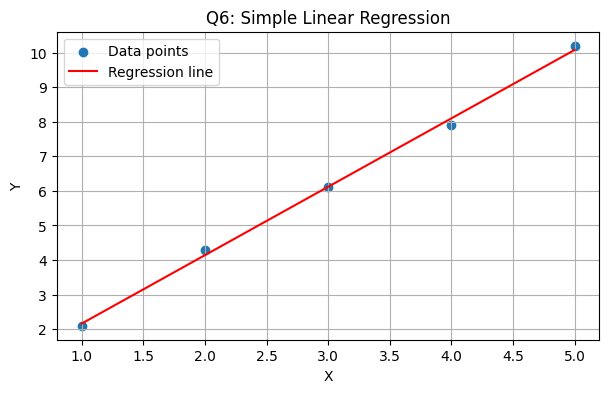

In [ ]:
# Q6: Simple Linear Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)

slope = model.coef_[0]
intercept = model.intercept_
Y_pred = model.predict(X)

print("Slope (m):", round(slope, 4))
print("Intercept (c):", round(intercept, 4))
print("Predicted Y:", np.round(Y_pred, 4))
print("Residuals (Y - Y_pred):", np.round(Y - Y_pred, 4))

# Plot
plt.figure(figsize=(7,4))
plt.scatter(X, Y, label='Data points')
plt.plot(X, Y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Q6: Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


##7. Fit a Multiple Linear Regression model on this sample data:
- ● Area = [1200, 1500, 1800, 2000]

- ● Rooms = [2, 3, 3, 4]

- ● Price = [250000, 300000, 320000, 370000]

Check for multicollinearity using VIF and report the results.

- ✅Python:

In [ ]:
# Q7: Multiple Linear Regression + VIF
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data
data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

X = data[['Area', 'Rooms']]
y = data['Price']

# Fit model
lr = LinearRegression().fit(X, y)
print("Intercept:", lr.intercept_)
print("Coefficients (Area, Rooms):", lr.coef_)

# VIF calculation using statsmodels
X_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

print("\nVIF results:")
print(vif_data)


Intercept: 103157.89473684214
Coefficients (Area, Rooms): [   63.15789474 34736.84210526]

VIF results:
  feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


##8. Implement polynomial regression on the following data:
  - ● X = [1, 2, 3, 4, 5]

  - ● Y = [2.2, 4.8, 7.5, 11.2, 14.7]

   
Fit a 2nd-degree polynomial and plot the resulting curve.

- ✅Python:

Intercept: 0.06
Coefficients (for [1, X, X^2]): [0.   1.94 0.2 ]


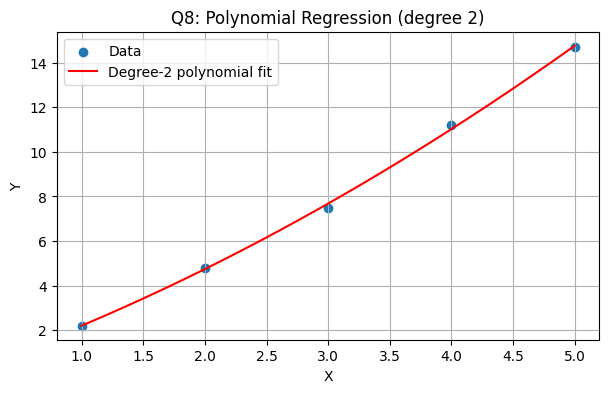

In [ ]:
# Q8: Polynomial Regression degree=2 (Colab)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = np.array([2.2,4.8,7.5,11.2,14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)  # columns: [1, X, X^2]

model = LinearRegression().fit(X_poly, Y)

print("Intercept:", round(model.intercept_, 6))
print("Coefficients (for [1, X, X^2]):", np.round(model.coef_, 6))

# Predictions for plotting
X_plot = np.linspace(1,5,200).reshape(-1,1)
Y_plot = model.predict(poly.transform(X_plot))

plt.figure(figsize=(7,4))
plt.scatter(X, Y, label='Data')
plt.plot(X_plot, Y_plot, color='red', label='Degree-2 polynomial fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Q8: Polynomial Regression (degree 2)')
plt.legend()
plt.grid(True)
plt.show()


##9. Create a residuals plot for a regression model trained on this data:
  - ● X = [10, 20, 30, 40, 50]

  - ● Y = [15, 35, 40, 50, 65]

Assess heteroscedasticity by examining the spread of residuals.

- ✅Python:

Predicted Y: [18.  29.5 41.  52.5 64. ]
Residuals: [-3.   5.5 -1.  -2.5  1. ]


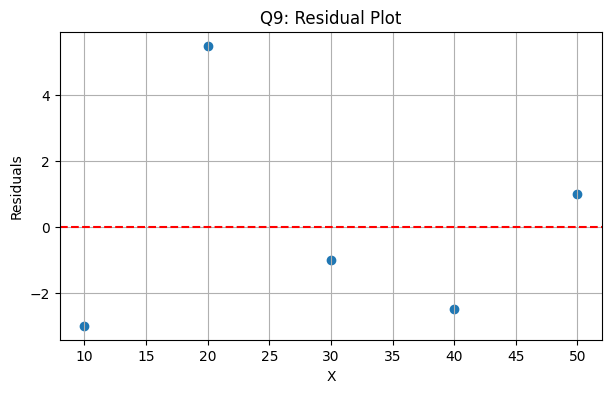

In [ ]:
# Q9: Residual plot and heteroscedasticity check
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10,20,30,40,50]).reshape(-1,1)
Y = np.array([15,35,40,50,65])

model = LinearRegression().fit(X, Y)
Y_pred = model.predict(X)
residuals = Y - Y_pred

print("Predicted Y:", np.round(Y_pred, 4))
print("Residuals:", np.round(residuals, 4))

# Residual plot
plt.figure(figsize=(7,4))
plt.scatter(X.flatten(), residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Q9: Residual Plot')
plt.grid(True)
plt.show()

# Optional: If you have statsmodels available, run Breusch-Pagan test:
# from statsmodels.stats.diagnostic import het_breuschpagan
# import statsmodels.api as sm
# lm = sm.OLS(Y, sm.add_constant(X)).fit()
# bp_test = het_breuschpagan(lm.resid, lm.model.exog)
# print("Breusch-Pagan test (LM stat, p-value, F stat, F p-value):", bp_test)


##10. Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

- Address multicollinearity: compute VIF for numeric features; if VIF is high, consider removing or combining correlated features (e.g., use area_per_room), apply dimensionality reduction (PCA), or use regularized models (Ridge, Lasso) that shrink correlated coefficients.

- Address heteroscedasticity: try transforming the target (log price) or predictors; apply Weighted Least Squares (WLS) where observations are weighted by inverse variance; use heteroscedasticity-robust standard errors to make inference reliable.

- Model validation: use cross-validation to assess generalization and compare models.

- Feature engineering & encoding: encode location (one-hot or target encoding), and engineer interaction terms only if meaningful.

- Diagnostics & re-check: after adjustments, re-run residual diagnostics (plots and tests like Breusch-Pagan) and check VIFs again; finalize the model that balances bias/variance and interpretability.

#************************************ END ************************************